# CHAPTER 04 다양한 분류 알고리즘

## 04-1 로지스틱 회귀



In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()  # head() : 처음 n개 행을 출력 (default: n=5)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))  # unique('Feature') : 'Feature'열에서 고유한 값을 추출
# 타깃값들

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()  # 5개 열을 입력데이터로 사용
print(fish_input[:5])

fish_target = fish['Species'].to_numpy()  # 타깃 데이터 설정

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# 훈련세트와 테스트세트로 나누어줌
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
# k-최근접 이웃 분류기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


**다중 분류** : 타깃 데이터에 2개 이상의 클래스가 포함된 문제

In [7]:
print(kn.classes_)  # classes_ 속성: 정렬된 타깃값 (알파벳 순)

print(kn.predict(test_scaled[:5]))  # 테스트세트의 첫 5개 샘플에 대한 예측

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [8]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])  # 클래스별로 확률값을 반환
print(np.round(proba, decimals=4))  # 소수점 4번째 자리까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [9]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 2차원 배열을 만들기 위해 슬라이싱 연산자 사용 (슬라이싱 사용 시 항상 2차원배열이 됨)
print(train_target[indexes])
# Roach 1개, Perch 2개 --> 2/3 확률 == 0.6667

# k-최근접 이웃을 사용하기 때문에 3개만 봐서 약함..

[['Roach' 'Perch' 'Perch']]


###**로지스틱 회귀** :
 이름은 회귀이지만 분류 모델임

*z* = *a* x (Weight) + *b* x (Length) + *c* x (Diagonal) + *d* x (Height) + *e* x (Width) + *f*

- 시그모이드 함수 (로지스틱 회귀)
 
 *Φ* = 1 / ( 1 + e^(-z) )

 0 ~ 1 사이의 범위를 가지는 함수 --> 0 ~ 1 사이 값을 0~100% 확률로 해석

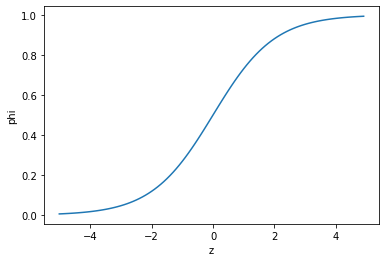

In [10]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [11]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])  # 1번째, 3번째 원소만 골라냄 (True인 index만)

['A' 'C']


In [12]:
# 이진 분류를 위해 로지스틱 회귀 적용

# 'Bream'과 'Smelt'행만 골라내는 작업
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]   # 'Bream'과 'Smelt' 만 있는 train_input
target_bream_smelt = train_target[bream_smelt_indexes]

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [14]:
print(lr.predict_proba(train_bream_smelt[:5]))  # 첫 번째 열 : 음성클래스(0)
                                                # 두 번째 열 : 양성클래스(1)
print(lr.classes_)  # 알파벳순으로 정렬됨
                    # 'Bream' : 음성, 'Smelt' : 양성

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [15]:
print(lr.coef_, lr.intercept_)  # 로지스틱 회귀가 학습한 계수
# 각 클래스마다 다른 coef와 intercept를 구한다

# z = -0.404 x (Weight) - 0.576 x (Length) - 0.663 x (Diagonal) - 1.013 x (Height) - 0.732 x (Weight) - 2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [16]:
decisions = lr.decision_function(train_bream_smelt[:5])  # '양성 클래스'에 대한 z값 반환
print(decisions)   # z 값들
# z 값들은 각 샘플마다 클래스 수만큼 있다

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [17]:
from scipy.special import expit  # expit() : 사이파이 라이브러리 안의 시그모이드 함수
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


**로지스틱 회귀로 다중 분류 수행하기**

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다.

충분하게 훈련시키기 위해 반복 횟수를 적당히 늘린다 (밑에서는 max_iter=1000으로).

기본적으로 릿지 회귀와 같이 계수의 제곱을 규제 (L2 규제)

LogisticRegression에서 규제를 제어하는 매개변수는 *C* 이다 --> alpha와 반대로 작을수록 규제가 커진다. (기본값: 1)

In [18]:
lr = LogisticRegression(C=20, max_iter=1000)  # default: max_iter=100
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [19]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [20]:
proba = lr.predict_proba(test_scaled[:5])  # 테스트세트의 처음 5개 샘플에 대한 예측 확률
print(np.round(proba, decimals=3))
print()
print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [21]:
print(lr.coef_.shape, lr.intercept_.shape)

# 다중 분류는 클래스마다 z값을 하나씩 계산하여, 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.

(7, 5) (7,)


시그모이드 함수는 하나의 선형 방정식의 출력값을 0~1 사이로 압축하는 반면에, --> 이진분류할 때

**소프트맥스 함수**는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다. --> 다중분류할 때

'정규화된 지수함수' 라고도 불린다.


In [22]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
# 각 행은 z1 ~ z7 으로 되있으며, 각 행마다 지수함수의 합은 1이다 (e^zi들의 합 = 1)

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [23]:
from scipy.special import softmax   # 사이파이에서 제공하는 소프트맥스 함수
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

# 출력결과가 lr.predict_proba() 배열과 일치한다

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 04.2 확률적 경사 하강법

가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표 (천천히 조금씩)

점진적인 학습이 가능하다!

(손실 함수 줄이기)

**손실함수 ( 비용함수 )** :

머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준 --> 최솟값을 찾아야 함

손실함수는 연속적이어야 한다 ( 미분 가능해야 함)

**로지스틱 손실 함수** ( 이진 크로스엔트로피 손실 함숫 )

- 타깃 = 1 일 때 --> - log(예측확률)

- 타깃 = 2 일 때 --> - log(1 - 예측확률)

확률이 1에서 멀어질수록 손실은 아주 큰 양수가 된다.

SGDClassifier

In [24]:
# 데이터 프레임 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [25]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [26]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [27]:
# 특성 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [28]:
from sklearn.linear_model import SGDClassifier  # 사이킷런에서 확률적 경사 하강법을 제공하는 클래스

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)  # loss='log': 손실함수 지정, max_iter=10: 에포크 횟수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 점수가 낮다 -> 반복 횟수가 적다?

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [29]:
# 확률적 경사 하강법은 점진적 학습이 가능하므로 객체를 다시 만들지 않고 추가로 더 훈련하기로 하자
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


적은 에포크 --> 과소적합일 확률 농후

많은 에포크 --> 과대적합일 확률 농후

과대적합이 시작하기 전에 훈련을 멈춰야 한다 ( 조기 종료 )

In [30]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [31]:
for _ in range(0, 300):   # 300번의 에포크 동안 훈련 반복
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

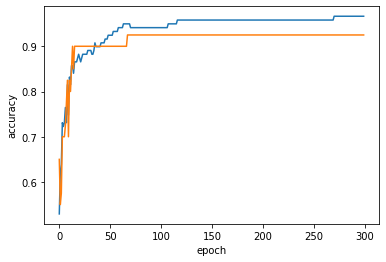

In [32]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 이 모델의 경우 100번째 에포크가 적절해 보인다!

In [33]:
# max_iter=100으로 맞추고 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
# 일정 에포크 동안 성능이 향상되지 않으면 자동으로 멈추는데 tol=None으로 지정하여 멈추지 않고 무조건 max_iter만큼 반복된다.

sc.fit(train_scaled, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))   # 결과 not bad

0.957983193277311
0.925


loss 매개변수의 기본값은 'hinge' ( "서포트 벡터 머신"의 손실 함수 )이다

In [35]:
# 힌지 손실을 사용하여 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
